# Circular Arc Airfoil Data

In [34]:
import os
import sys
projdir = os.path.abspath('../..')
if not projdir in sys.path:
    sys.path.insert(0,projdir)

## Coefficient Data for 3% Arc

To analyze the Wart’s flights, we need some airfoil data. The wart uses a simplex airfoil for the wing and stab. Looking for suitable experimental data for this shape did not turn up anything useful. However, I was able to find some data for another common airfoil, the circular arc.

Research into the flight of insects {cite}`masato2016` produced some test data that seems appropriate for this study. Here is a sample of that data.

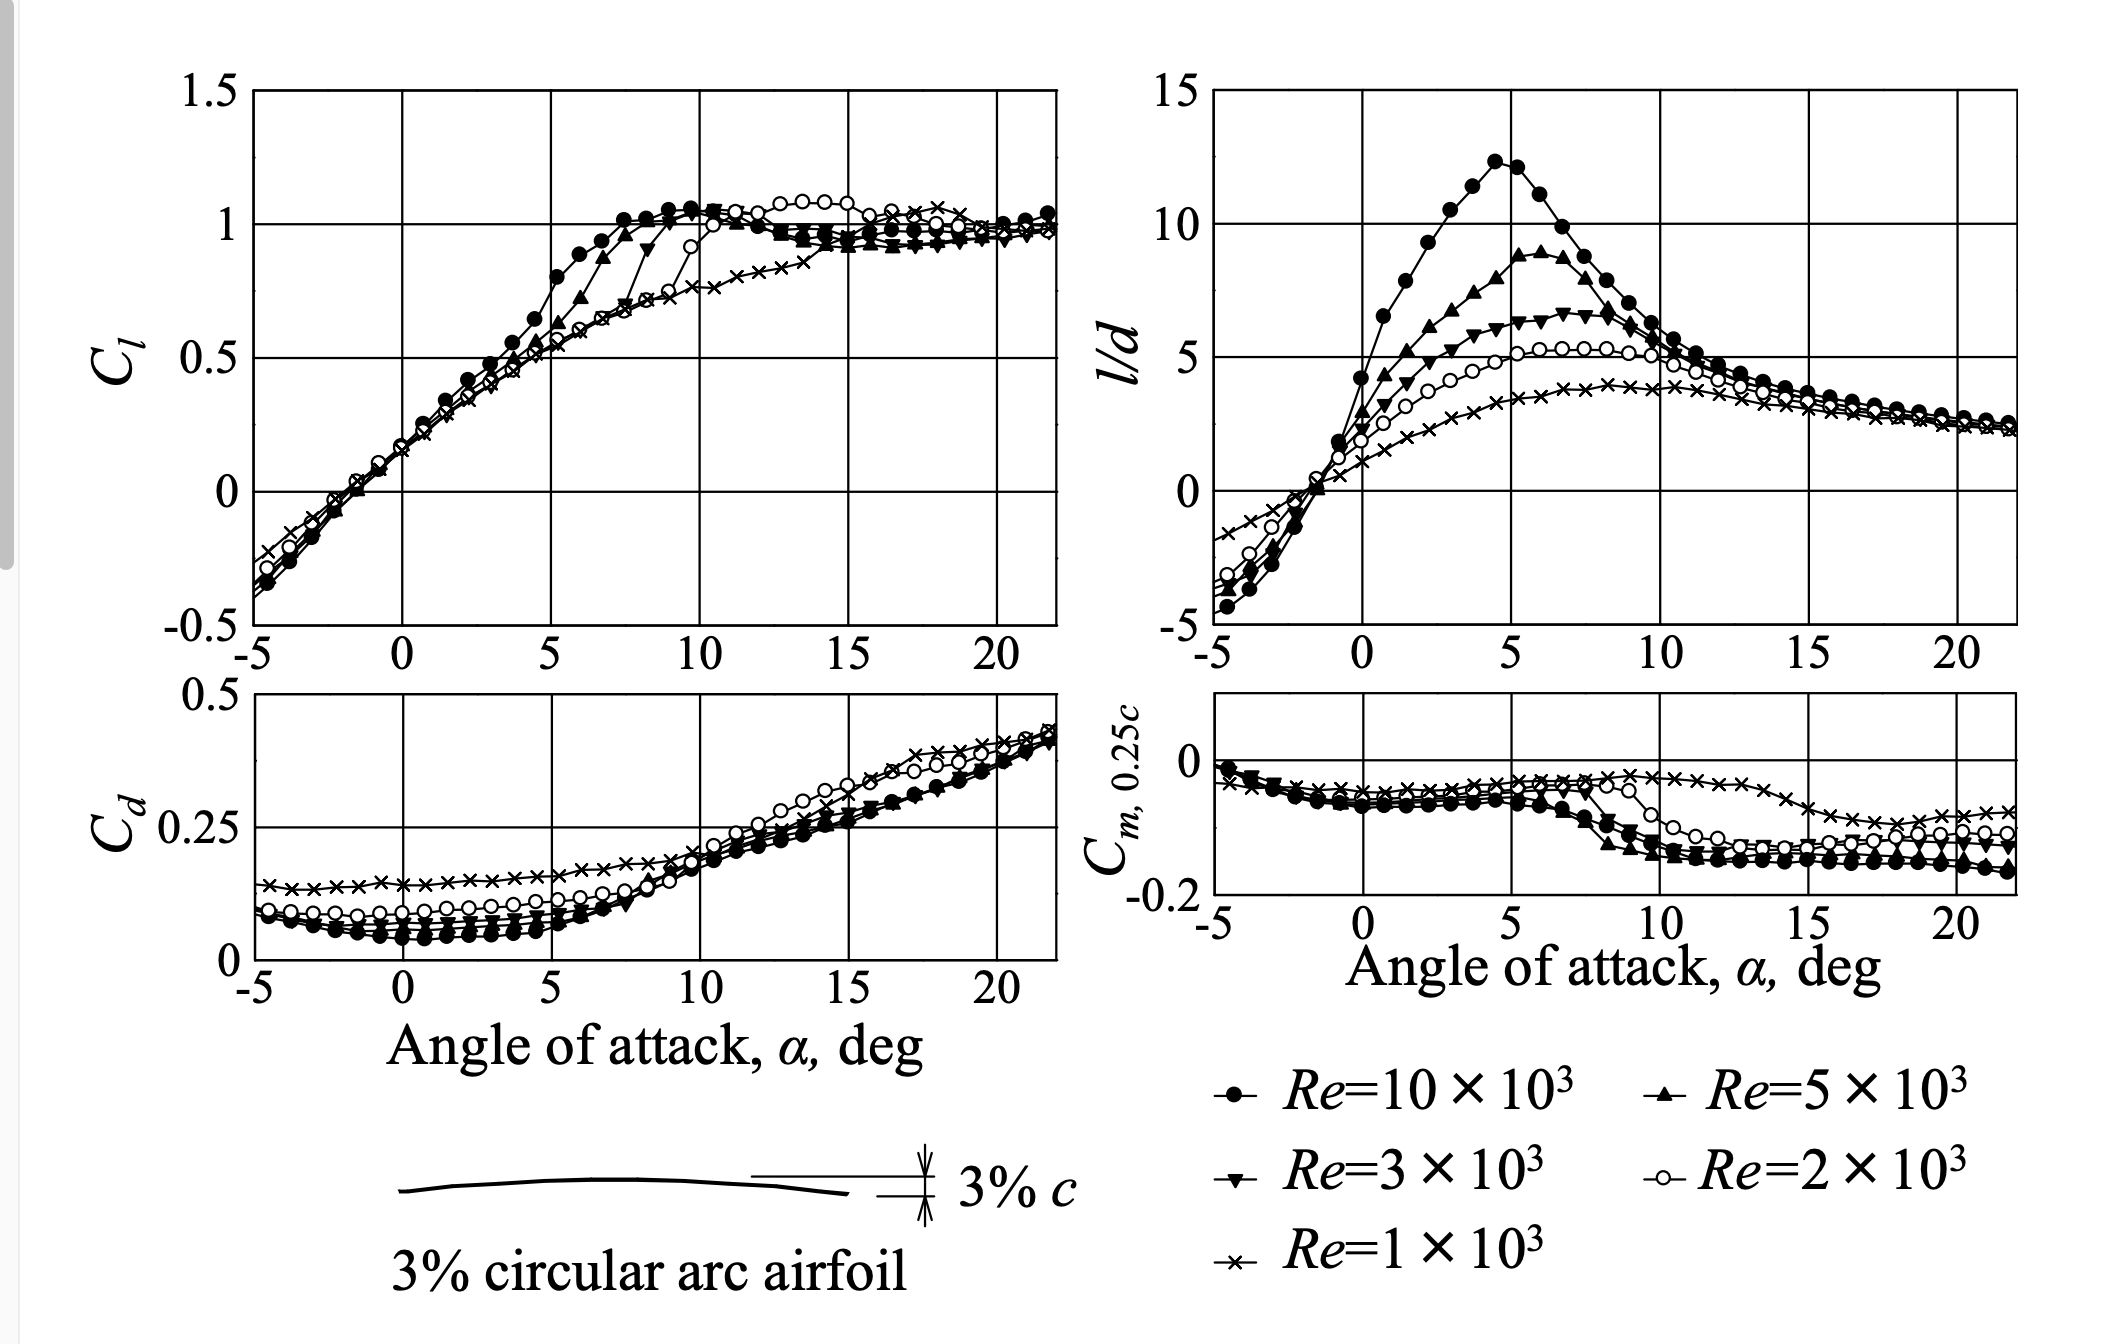

In [35]:
from IPython.display import Image
Image(filename="../../assets/images/3%-arc.png")

Digitizing these curves produced more lumpy curves.  Since I plan on creating a library of airfoil data for testing designs, I wrote a data management routine that lets me select an airfoil by name, then load coefficient data needed for analysis work. I have created my own Python package for this project named **mmtime**.  The **AirfoilMgr** routine manages airfoil data files. I also created utility routines that load data points and smooth the curve through points. You can find this code in the project GitHub directory. Here is an example of using that code:

In [36]:
from mmtime.utils import get_points, show_curve, fit_curve

In [37]:
import os
from pathlib import Path
projdir = Path('../..')
datadir = projdir / 'mmtime' / 'data' / 'airfoils' / 'arc3'

### Lift Coefficient $C_l$

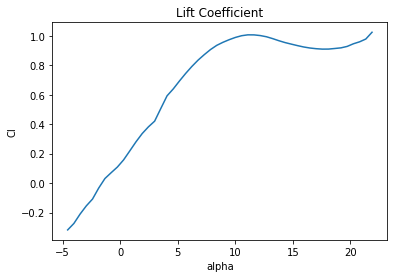

In [38]:
clfile = datadir / 'CL-re3k.csv'
cl_x, cl_y = get_points(clfile)
alpha_pts = np.linspace(cl_x[0], cl_x[-1], 50)
smooth_cl = fit_curve(cl_x, cl_y, smooth=True)
cl_smooth = smooth_cl(alpha_pts)
show_curve(alpha_pts, cl_smooth, "Lift Coefficient", "alpha","Cl")

### Drag Coefficient $C_d$

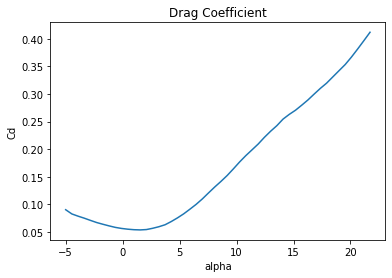

In [39]:
cdfile = datadir / 'CD-re3k.csv'
cd_x, cd_y = get_points(cdfile)
alpha_pts = np.linspace(cd_x[0], cd_x[-1], 50)
smooth_cd = fit_curve(cd_x, cd_y, smooth=True)
cd_smooth = smooth_cd(alpha_pts)
show_curve(alpha_pts, cd_smooth, "Drag Coefficient", "alpha","Cd")

### Moment Coefficient $C_m$

36


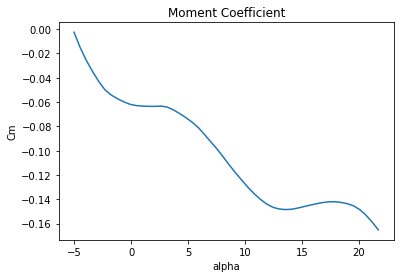

In [40]:
cmfile = datadir / 'CM-re3k.csv'
cm_x, cm_y = get_points(cmfile)
print(len(cm_x))
smooth_cm = fit_curve(cm_x, cm_y, smooth=True)
cm_smooth = smooth_cm(alpha_pts)
show_curve(alpha_pts, cm_smooth, "Moment Coefficient", "alpha","Cm")

Let's build the lift-drag polar plot

In [41]:
ClFunc = fit_curve(alpha_pts, cl_smooth)
CdFunc = fit_curve(alpha_pts, cd_smooth)

To create this plot, we create a sample set of angle of attack values, then for each value in that set, use of lift and drag curve fit functions to generate the associated $C_l$ and $C_d$ points.

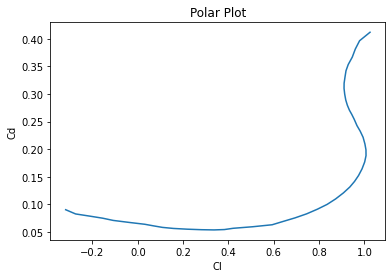

In [42]:
alpha = np.linspace(alpha_pts[0], alpha_pts[-1], 50)
p_x = []
p_y = []
for a in alpha:
    p_y.append(CdFunc(a))
    p_x.append(ClFunc(a))
show_curve(p_x, p_y, "Polar Plot", "Cl", "Cd")
    

Cl/Cd PLot

Next we will generate a lift over drag curve as a function of angle of attack. We already have the functions available, and **numpy** makes generating the $L/D$ values simple.

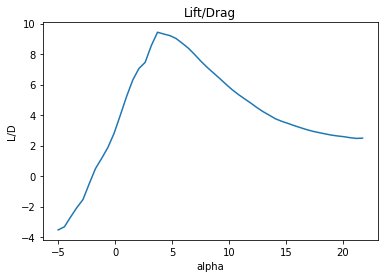

In [43]:
Cl = ClFunc(alpha)
Cd = CdFunc(alpha)
lod = Cl / Cd
show_curve(alpha, lod, "Lift/Drag", "alpha", "L/D")

It looks like the most efficient angle of attack for this airfoil would be about 5 degrees. 

## Unpublished Coefficient Data for 5% Arc

For the 5% arc airfoil, we have a problem. The data I found included $C_l$, $C_m$ and $C_l/C_d$. That means we have to extract $C_d$ by processing the other data.

Here is the lift curve:

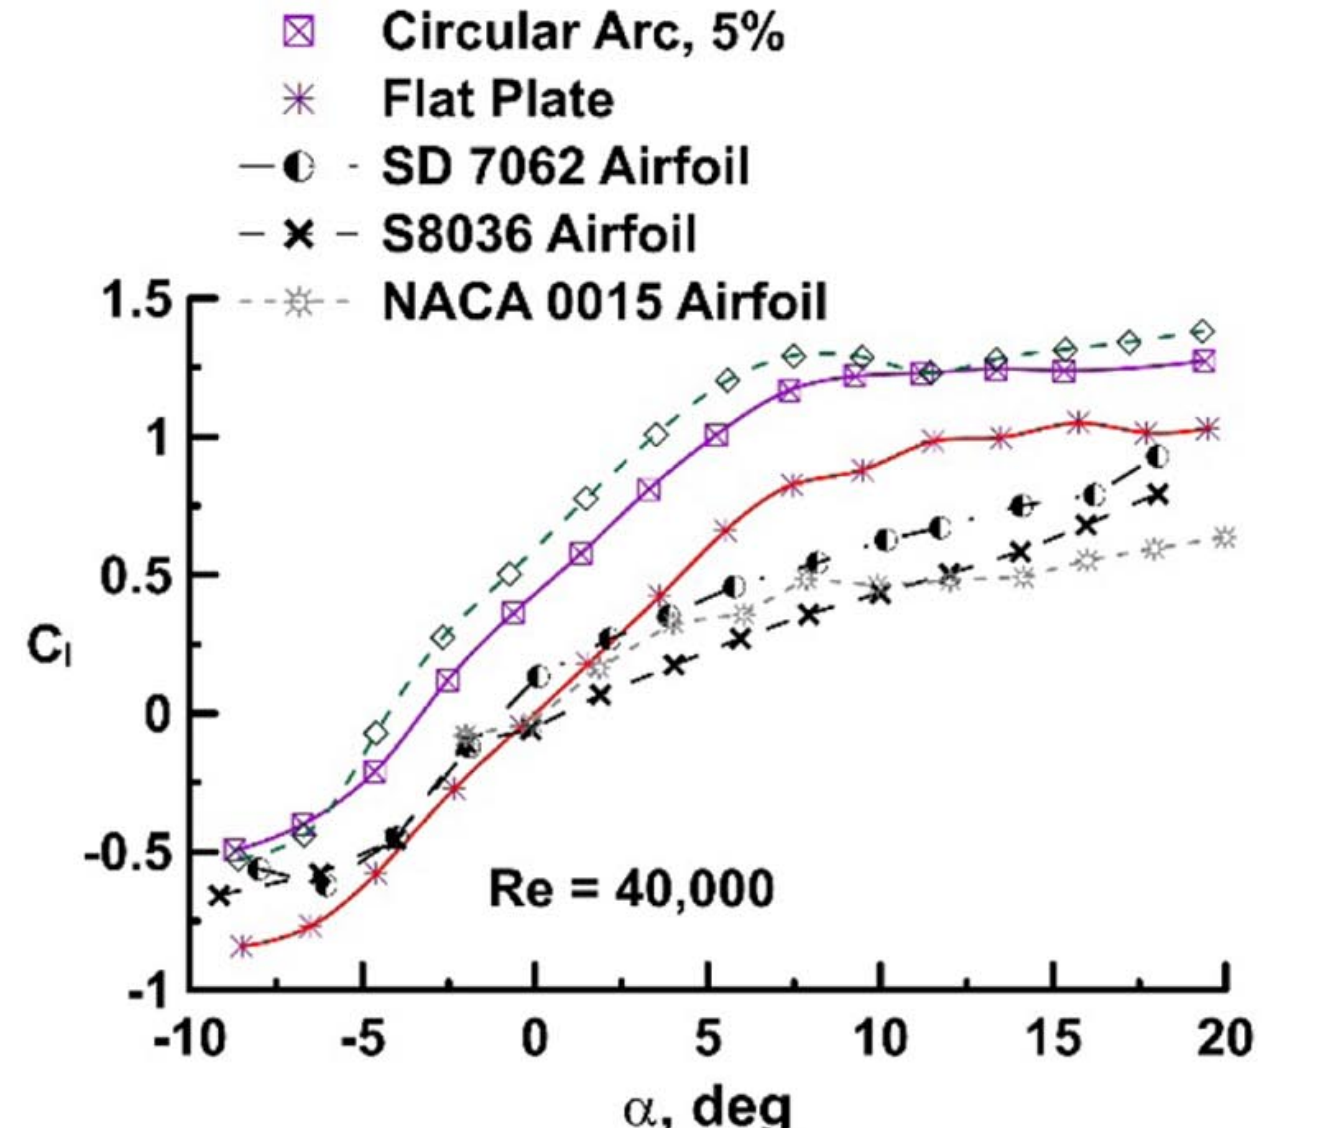

In [44]:
Image(filename="../../assets/images/5%-lift-coefficient.png")

The Reynolds Number for this data is too high for our study.

In [45]:
datadir = projdir / 'mmtime' / 'data' / 'airfoils' / 'arc5'

In [46]:
clfile = datadir / 'CL.csv'
cl_x, cl_y = get_points(clfile)

In [47]:
len(cl_y)

15

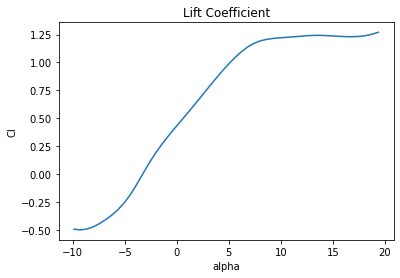

In [48]:
alpha_pts = np.linspace(cl_x[0],cl_x[-1],50)
fit_cl = fit_curve(cl_x, cl_y, smooth=False)
cl_fit = fit_cl(alpha_pts)
show_curve(alpha_pts, cl_fit, "Lift Coefficient", "alpha","Cl")

Now let's look at the pitching moment curve. This curve plots $C_m$ against $C_l$.

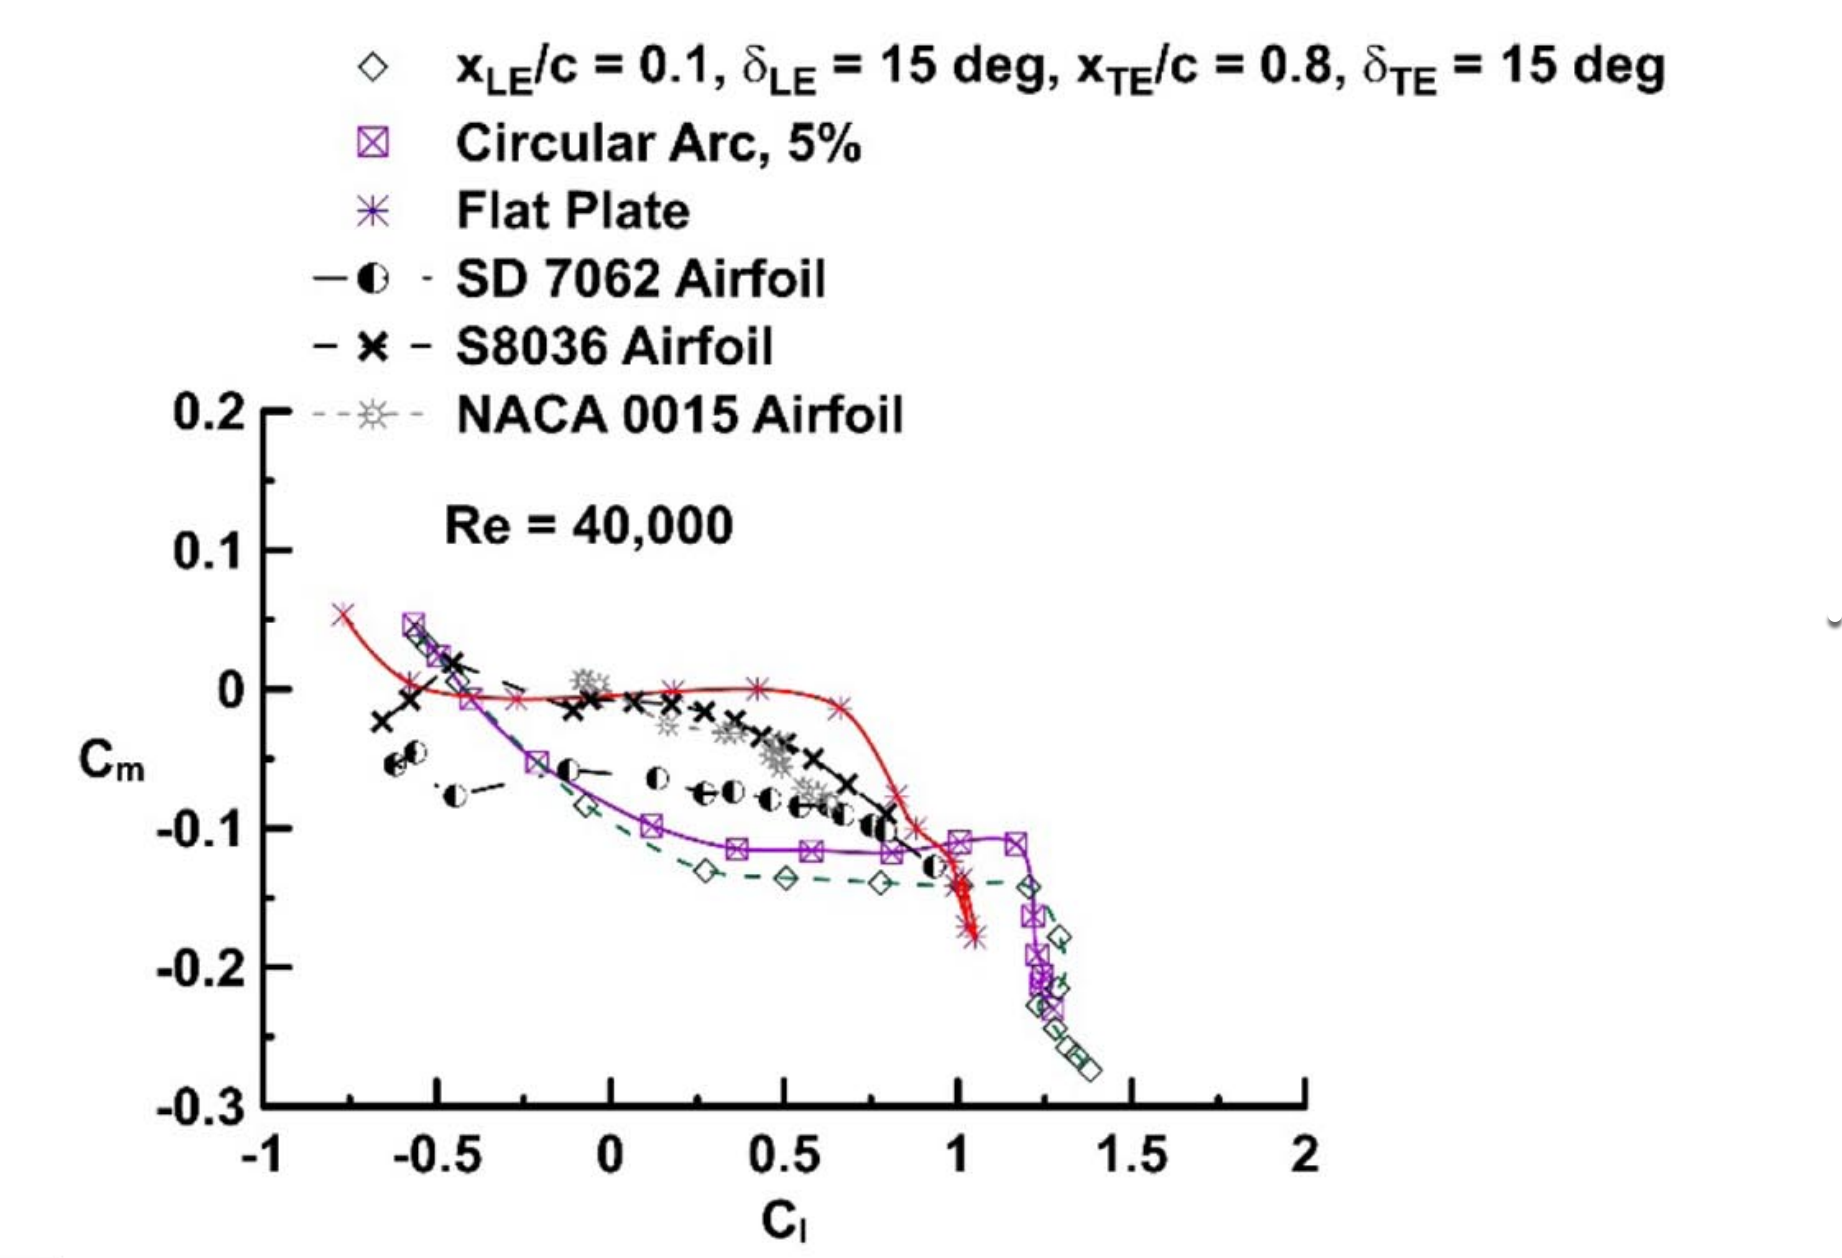

In [52]:
Image(filename="../../assets/images/5%-moment-coefficient.png")

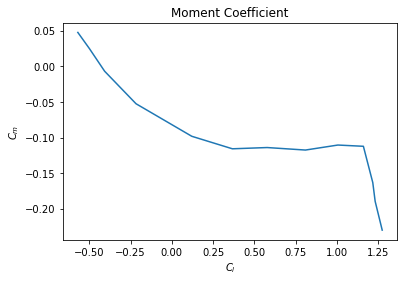

In [55]:
cmfile = datadir / 'CM.csv'
cm_x, cm_y = get_points(cmfile)
show_curve(cm_x, cm_y, "Moment Coefficient", "$C_l$","$C_m$")

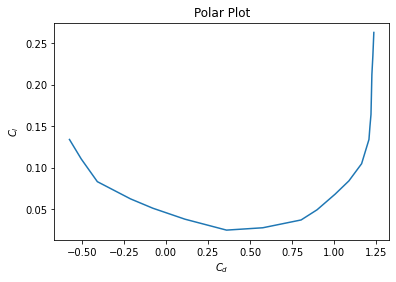

In [56]:
pfile = datadir / 'CL-CD.csv'
p_x, p_y = get_points(pfile)
show_curve(p_x, p_y, "Polar Plot", "$C_d$","$C_l$")